In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score, precision_score, f1_score, log_loss
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

## Autoreload
https://ipython.org/ipython-doc/3/config/extensions/autoreload.html

In [2]:
%load_ext autoreload

In [3]:
%autoreload 1

In [4]:
%aimport

Modules to reload:


Modules to skip:



In [5]:
%aimport RUL_Model

In [6]:
%aimport

Modules to reload:
RUL_Model

Modules to skip:



In [7]:
def plot_predictions(rul_filename, predictions):
    rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
    rul_true.columns = ['True', '']
    rul_true['Predicted'] = predictions
    rul_true = rul_true[['True', 'Predicted']]

    plt.figure(figsize=(7,4))
    plt.scatter(rul_true['True'], rul_true['Predicted'])
    plt.ylabel('Predicted RUL')
    plt.xlabel('True RUL')
    plt.title('Comparing Model Projections to Baseline')

def run(file_number):
    test_df = pd.read_csv('test_FD00{}.txt'.format(file_number), sep=" ", header=None)
    test_df = RUL_Model.preprocess_and_predict(test_df)
    predictions = RUL_Model.summarize_predictions_by_unit(test_df)
    print("Number of predictions:", len(predictions))
    plot_predictions('RUL_FD00{}.txt'.format(file_number), predictions=predictions)

## Baseline Saved Model

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Number of predictions: 100


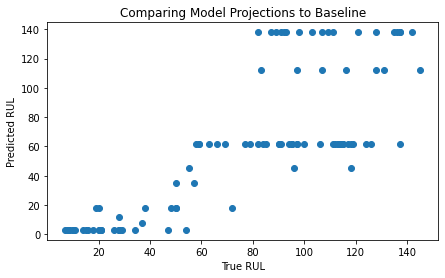

In [3]:
run(1)

In [8]:
train_df = pd.read_csv('train_FD001.txt', sep=" ", header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


## Demonstrating Automated Retraining

In [5]:
x_train_img, y_train = RUL_Model.preprocess_train(train_df)
model = RUL_Model.train_model(x_train_img, y_train)
model.save('ClassifierV3_AutomatedRetraining.h5')

#id: 100
['setting1', 'setting2', 's2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']
Epoch 1/25
25/25 - 50s - loss: 2.5935 - accuracy: 0.1552 - val_loss: 2.5828 - val_accuracy: 0.1538
Epoch 2/25
25/25 - 49s - loss: 2.4186 - accuracy: 0.1766 - val_loss: 2.4037 - val_accuracy: 0.1663
Epoch 3/25
25/25 - 49s - loss: 2.1233 - accuracy: 0.2210 - val_loss: 2.0876 - val_accuracy: 0.2434
Epoch 4/25
25/25 - 49s - loss: 1.9315 - accuracy: 0.2631 - val_loss: 2.1955 - val_accuracy: 0.2581
Epoch 5/25
25/25 - 48s - loss: 1.8220 - accuracy: 0.2951 - val_loss: 2.0011 - val_accuracy: 0.2581
Epoch 6/25
25/25 - 49s - loss: 1.7335 - accuracy: 0.3301 - val_loss: 2.0490 - val_accuracy: 0.2821
Epoch 7/25
25/25 - 49s - loss: 1.6521 - accuracy: 0.3512 - val_loss: 1.9059 - val_accuracy: 0.2971
Epoch 8/25
25/25 - 49s - loss: 1.5823 - accuracy: 0.3781 - val_loss: 2.2253 - val_accuracy: 0.2795
Epoch 9/25
25/25 - 49s - loss: 1.5323 - accuracy: 0.3988 - val_loss: 2.1496 

## Compare Predictions to Previously Loaded Model

Number of predictions: 100


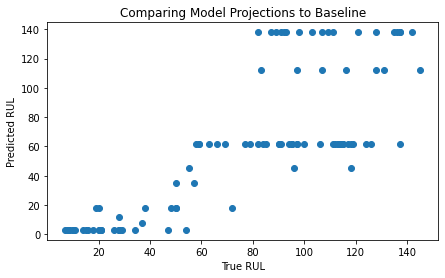

In [7]:
file_number = 1
test_df = pd.read_csv('test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df, model_filename='ClassifierV3_AutomatedRetraining.h5')
predictions = RUL_Model.summarize_predictions_by_unit(test_df)
print("Number of predictions:", len(predictions))
plot_predictions('RUL_FD00{}.txt'.format(file_number), predictions=predictions)

Number of predictions: 259


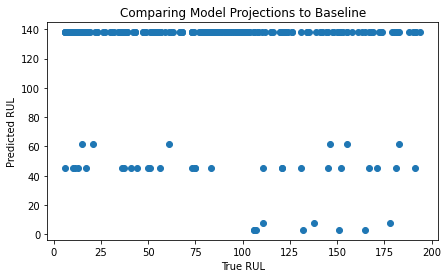

In [8]:
run(2)

## Applying Model Predictions to Second Dataset

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Number of predictions: 259


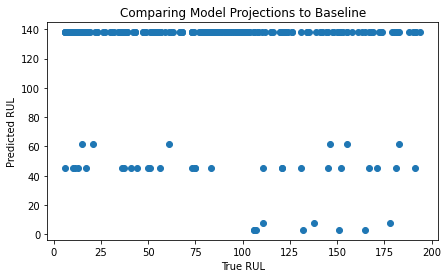

In [9]:
file_number = 2
test_df = pd.read_csv('test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df, model_filename='ClassifierV3_AutomatedRetraining.h5')
predictions = RUL_Model.summarize_predictions_by_unit(test_df)
print("Number of predictions:", len(predictions))
plot_predictions('RUL_FD00{}.txt'.format(file_number), predictions=predictions)

Number of predictions: 100


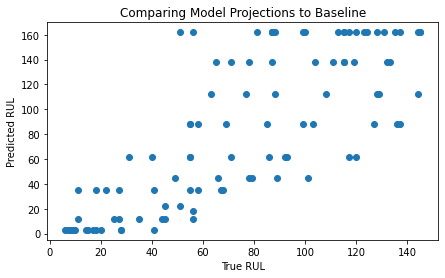

In [9]:
run(3)

In [ ]:
file_number = 3
test_df = pd.read_csv('test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df, model_filename='ClassifierV3_AutomatedRetraining.h5')
predictions = RUL_Model.summarize_predictions_by_unit(test_df)
print("Number of predictions:", len(predictions))
plot_predictions('RUL_FD00{}.txt'.format(file_number), predictions=predictions)

## Retrain with Simple Binary Classification

In [7]:
x_train_img, y_train = RUL_Model.preprocess_train(train_df, w = [40])
model = RUL_Model.train_model(x_train_img, y_train, w = [40])
model.save('ClassifierV3_AutomatedRetraining_SimpleBinary.h5')

#id: 100
['setting1', 'setting2', 's2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']
Epoch 1/25
25/25 - 51s - loss: 0.7641 - accuracy: 0.7131 - val_loss: 0.5283 - val_accuracy: 0.7640
Epoch 2/25
25/25 - 49s - loss: 0.4523 - accuracy: 0.7400 - val_loss: 0.3282 - val_accuracy: 0.9060
Epoch 3/25
25/25 - 49s - loss: 0.2179 - accuracy: 0.9235 - val_loss: 0.2052 - val_accuracy: 0.9146
Epoch 4/25
25/25 - 49s - loss: 0.1714 - accuracy: 0.9403 - val_loss: 0.1937 - val_accuracy: 0.9223
Epoch 5/25
25/25 - 49s - loss: 0.1550 - accuracy: 0.9448 - val_loss: 0.1773 - val_accuracy: 0.9376
Epoch 6/25
25/25 - 49s - loss: 0.1441 - accuracy: 0.9499 - val_loss: 0.1765 - val_accuracy: 0.9344
Epoch 7/25
25/25 - 49s - loss: 0.1345 - accuracy: 0.9552 - val_loss: 0.1713 - val_accuracy: 0.9383
Epoch 8/25
25/25 - 49s - loss: 0.1288 - accuracy: 0.9576 - val_loss: 0.1796 - val_accuracy: 0.9284
Epoch 9/25
25/25 - 49s - loss: 0.1194 - accuracy: 0.9614 - val_loss: 0.1665 

## Loading additional Data

In [8]:
train_df = .head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


### Subsetting to first n cycles

## Automated Retraining Using Additional Realtime Data

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        20631 non-null  int64  
 1   cycle     20631 non-null  int64  
 2   setting1  20631 non-null  float64
 3   setting2  20631 non-null  float64
 4   setting3  20631 non-null  float64
 5   s1        20631 non-null  float64
 6   s2        20631 non-null  float64
 7   s3        20631 non-null  float64
 8   s4        20631 non-null  float64
 9   s5        20631 non-null  float64
 10  s6        20631 non-null  float64
 11  s7        20631 non-null  float64
 12  s8        20631 non-null  float64
 13  s9        20631 non-null  float64
 14  s10       20631 non-null  float64
 15  s11       20631 non-null  float64
 16  s12       20631 non-null  float64
 17  s13       20631 non-null  float64
 18  s14       20631 non-null  float64
 19  s15       20631 non-null  float64
 20  s16       20631 non-null  fl

In [10]:
train_df.to_csv("Train001_Reformated.csv", index=False)

## Plot Predicitons

Number of predictions: 248


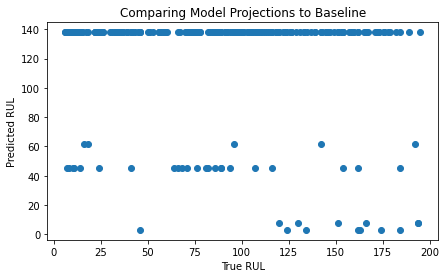

In [10]:
run(4)

In [11]:
model = RUL_Model.model

In [14]:
model.metrics

In [19]:
#file_number = 2
#test_df = pd.read_csv('test_FD00{}.txt'.format(file_number), sep=" ", header=None)
#test_df = RUL_Model.preprocess_and_predict(test_df)
#predictions = RUL_Model.summarize_predictions_by_unit(test_df)

rul_filename = 'RUL_FD00{}.txt'.format(file_number)
rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
rul_true.columns = ['True', '']
rul_true['Predicted'] = predictions
rul_true = rul_true[['True', 'Predicted']]

rul_true.head()

,True,Predicted
0,18,138.0
1,79,138.0
2,106,138.0
3,110,138.0
4,15,138.0


In [20]:
w = [200,175,150,125,100,75,50,40,30,25,20,15,10,5] #Bin definitions associated with current models

### Scores for Test File 1

In [30]:
file_number = 1
test_df = pd.read_csv('test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df)
predictions = RUL_Model.summarize_predictions_by_unit(test_df)

rul_filename = 'RUL_FD00{}.txt'.format(file_number)
rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
rul_true.columns = ['True', '']
rul_true['Predicted'] = predictions
rul_true = rul_true[['True', 'Predicted']]

rul_true['True_label'] = np.where(rul_true['True'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['True'] <= w[i], 'True_label'] = i+1
    
rul_true['Predicted_label'] = np.where(rul_true['Predicted'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['Predicted'] <= w[i], 'Predicted_label'] = i+1
    
print("recall_score:", recall_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("precision_score:", precision_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("f1_score:", f1_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))

recall_score: 0.16
precision_score: 0.13333333333333333
f1_score: 0.12041056394879483


### Scores for Test File 2

In [29]:
file_number = 2
test_df = pd.read_csv('test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df)
predictions = RUL_Model.summarize_predictions_by_unit(test_df)

rul_filename = 'RUL_FD00{}.txt'.format(file_number)
rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
rul_true.columns = ['True', '']
rul_true['Predicted'] = predictions
rul_true = rul_true[['True', 'Predicted']]

rul_true['True_label'] = np.where(rul_true['True'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['True'] <= w[i], 'True_label'] = i+1
    
rul_true['Predicted_label'] = np.where(rul_true['Predicted'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['Predicted'] <= w[i], 'Predicted_label'] = i+1
    
print("recall_score:", recall_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("precision_score:", precision_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("f1_score:", f1_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))

recall_score: 0.07722007722007722
precision_score: 0.03233443141700022
f1_score: 0.025080795395704007


## Scores For Test File 3

In [31]:
file_number = 3
test_df = pd.read_csv('test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df)
predictions = RUL_Model.summarize_predictions_by_unit(test_df)

rul_filename = 'RUL_FD00{}.txt'.format(file_number)
rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
rul_true.columns = ['True', '']
rul_true['Predicted'] = predictions
rul_true = rul_true[['True', 'Predicted']]

rul_true['True_label'] = np.where(rul_true['True'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['True'] <= w[i], 'True_label'] = i+1
    
rul_true['Predicted_label'] = np.where(rul_true['Predicted'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['Predicted'] <= w[i], 'Predicted_label'] = i+1
    
print("recall_score:", recall_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("precision_score:", precision_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("f1_score:", f1_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))

recall_score: 0.1
precision_score: 0.16527272727272727
f1_score: 0.12072321356804114


### Scores for Test Number 4

In [32]:
file_number = 4
test_df = pd.read_csv('test_FD00{}.txt'.format(file_number), sep=" ", header=None)
test_df = RUL_Model.preprocess_and_predict(test_df)
predictions = RUL_Model.summarize_predictions_by_unit(test_df)

rul_filename = 'RUL_FD00{}.txt'.format(file_number)
rul_true = pd.read_csv(rul_filename, sep=" ", header=None)
rul_true.columns = ['True', '']
rul_true['Predicted'] = predictions
rul_true = rul_true[['True', 'Predicted']]

rul_true['True_label'] = np.where(rul_true['True'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['True'] <= w[i], 'True_label'] = i+1
    
rul_true['Predicted_label'] = np.where(rul_true['Predicted'] <= w[0], 1, 0 )
for i in range(1,len(w)):
    rul_true.loc[rul_true['Predicted'] <= w[i], 'Predicted_label'] = i+1
    
print("recall_score:", recall_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("precision_score:", precision_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))
print("f1_score:", f1_score(rul_true['True_label'], rul_true['Predicted_label'], average="weighted"))

recall_score: 0.09274193548387097
precision_score: 0.012642200405173757
f1_score: 0.021727573120460638


### Outline:

1. Iterater Over Future Train Data for first n cycles:
    1. Through cycle 50, pause generate predictions
    2. Over the next 50 cycles, calculate model drift between predictions from above and what came to be.
        * Assumptions: mechanics can determine whether motor needed service during maintenance for motors flagged
        * This will be used to determine precision and model drift
        
        * !!! Warning:  Any motors not flagged that fail in the next n cycles will affect the recall score, and must trigger an immediate model retuning. This Drift is unacceptable!
        

If Recall score ever falls below 1: Immediate retraining and [Jira ticket] (Phase 1.5 tbd)
If precision falls below .8 or .9? then wasted resources, and also retraining needed
Alternatively, precision can be tracked as a cost score based on total maintenance cost

# Agenda Items

## Day One / Phase 1
1. Introduction to Model Drift (1 hour)
    1. Concept Drift
    2. Data Drift
2. Databricks Introduction (1 hour)
    1. MlFlow
3. ModelOps Introduction (could be moved elsewhere)
    1. Camunda?
    2. Jira
4. Returning to Turbofan engine degradation
    1. Differences in the Train / Test Files (See Readme [here](https://github.com/Information-International-Associates/Data-Challenge-3/tree/master/Data))
    2. This represents a concept drift
5. Applying Model Drift to Our RUL Model
    1. Metric Brainstrom for Model Drift
        1. Precision
        2. Recall
        3. F1
        4. Wasted Maintenance Cost
        5. Others....generate additional ideas from participants
        
## Day Two / Phase 1.5 - Implementing Model Drift In Vendor Platforms

2. Databricks Introduction (1 hour)
    1. MlFlow
3. ModelOps Introduction (could be moved elsewhere)
    1. Camunda?
    2. Jira

## Day Three / Phase 2



## To Do

Sumit:
* Outreach ModelOps Matt contact on needs for ModelOps; precision/recall scores
* Theoretical introduction / slides on ModelDrift

Matt:
* Cleaning up model training
    1. clean up API to streamline retraining
    2. reduce to binary classification
* Simulate outline above:
    1. run model (which was trained on training set 1 ONLY) on first 50 cycles of every unit train 2
        1. generate predictions
        2. calculate metrics
            > Determine if model drifted (probably will based on exploratory results above)
            > Implement retraining
            > 

In [ ]:
Productionalizing Model Deployment / 